15-388 Practical Data Science S'18 Tutorial<br>
Ian Friedman (ianf)


# Introduction to Independent Component Analysis (ICA)

With many datasets, the phenomena (or signal) we are observing is actually a mixture of multiple other independent signals. These underlying sources of data can be very important in understanding the phenomena modeled by the dataset. This tutorial will explain what ICA is and apply it in a two examples.

[Understanding ICA](#section1)
    <ul>
    <li><a href="#section1a">Basis Shifts</a></li>
    <li><a href="#section1b">Basis Shifts with PCA</a></li>
    <li><a href="#section1c">Basis Shifts with ICA</a></li>
    <li><a href="#section1d">Mathematical Definition of ICA</a></li>
    </ul>
    <br>
    
[Example: Peak Electrical Demand / High Temperature](#section2)
    <ul>
    <li><a href="#section2a">Plotting Data</a></li>
    <li><a href="#section2b">Running ICA</a></li>
    <li><a href="#section2c">Plotting Bases</a></li>
    <li><a href="#section2d">Checking Distributions</a></li>
    <li><a href="#section2e">Source Signals</a></li>
    <li><a href="#section2f">Visualizations</a></li>
    </ul>
    <br>
    
[Example: Cocktail Party Problem](#section3)
    <ul>
    <li><a href="#section3a">Introduction</a></li>
    <li><a href="#section3b">Loading and Inspecting Original Sounds</a></li>
    <li><a href="#section3c">Combining Sources and Inspecting</a></li>
    <li><a href="#section3d">Separating Sounds</a></li>
    </ul>
    <br>
    
[Conclusion](#section4)

In [1]:
from IPython.display import display, Image, Audio
import scipy.io.wavfile
from scipy import linalg
import sklearn.decomposition
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<a id="section1"></a>
## Understanding ICA 

<a id="section1a"></a>
### Basis Shifts

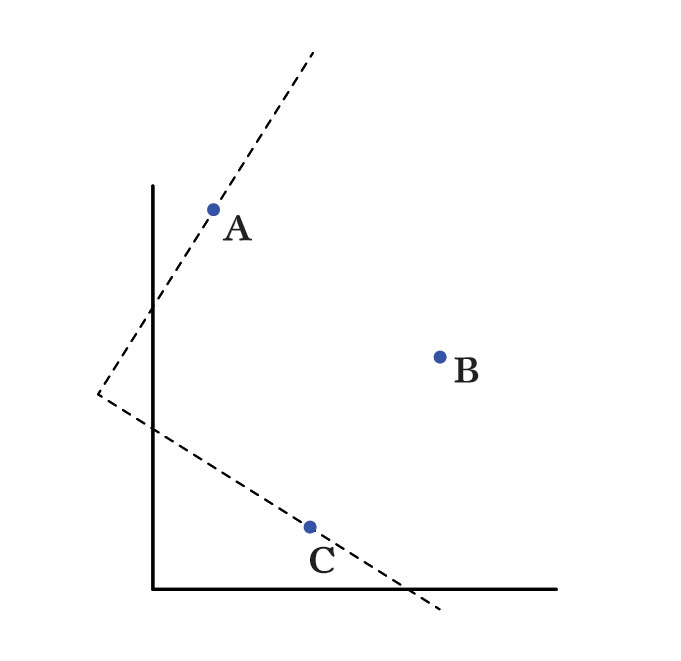

In [2]:
def displayImage(im, width = 300):
    display(Image(im, width = width, embed = True))
    
# Display basis shift diagram
displayImage('basisShift.jpg')

PCA and ICA are both methods of shifting the coordinate bases to better model a given dataset.<br>

The default bases in two dimensions are $\begin{bmatrix}1\\0\end{bmatrix}$ and $\begin{bmatrix}0\\1\end{bmatrix}$, which correspond to the $x$ and $y$ axes, respectively. <br>
In n dimensions, our standard bases would be $\begin{bmatrix}1\\0\\...\\0\end{bmatrix}\ , \  \begin{bmatrix}0\\1\\...\\0\end{bmatrix} \ ,\  ... \ ,\  \begin{bmatrix}0\\0\\...\\1\end{bmatrix}$

Without shifting our bases, we would describe the graph above as $A = (1,5)$, $B = (4,3)$, and $C = (2,1)$. <br>
After shifting our bases as shown with the dashed lines above, $A = (0,3)$, $B = (3,3)$, and $C = (3,0)$.

Shifting our bases in this way allows us to describe our data differently, and is what makes PCA and ICA so powerful.

<a id="section1b"></a>
### Basis Shifts with PCA

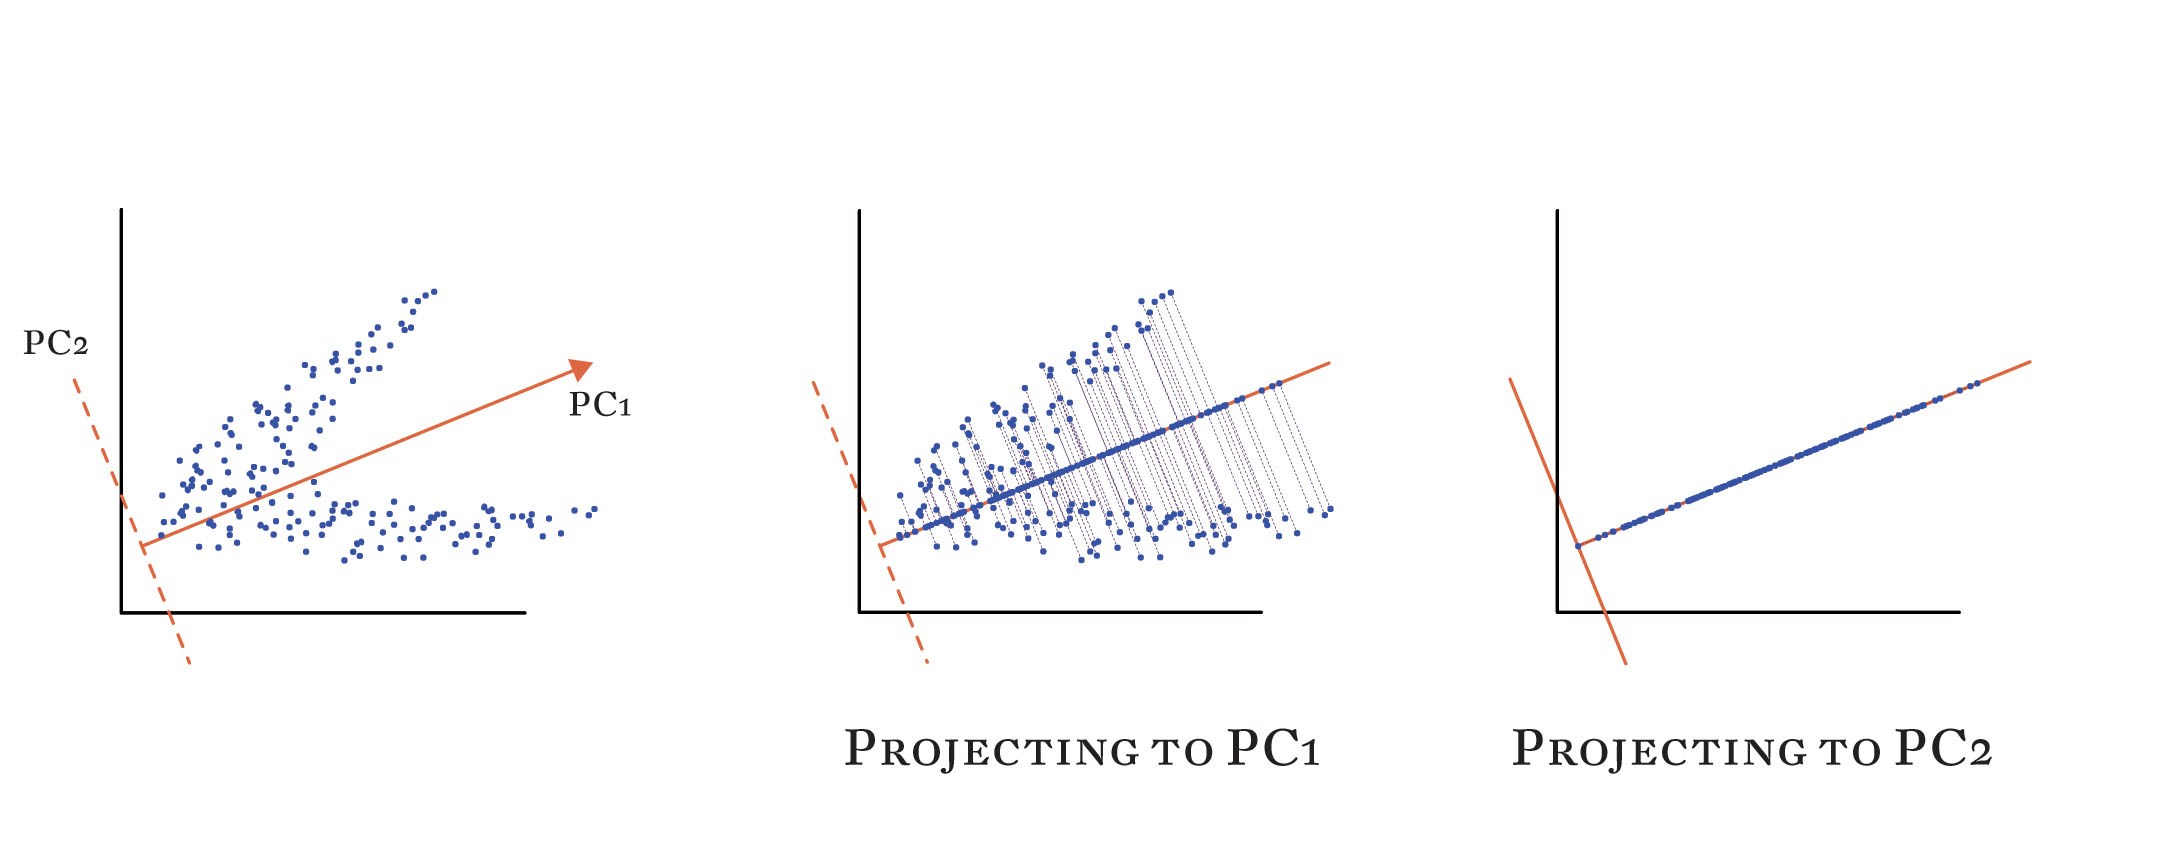

In [3]:
displayImage('orthogonality.jpg', width = 1000)

Our goal with PCA is generally to constrict a problem space to reduce redundancies of features represented in the data. We do this by finding a set of mutually orthogonal bases to describe our set with. This mutually orthogonal condition is the key to PCA. With orthogonal bases, we can easily remove bases by simply projecting our data onto all of the bases we find relevant. By the nature of orthogonality, all of our data is now represented with 0 variance in our unwanted bases - so we no longer have any need to maintain those features of the data.


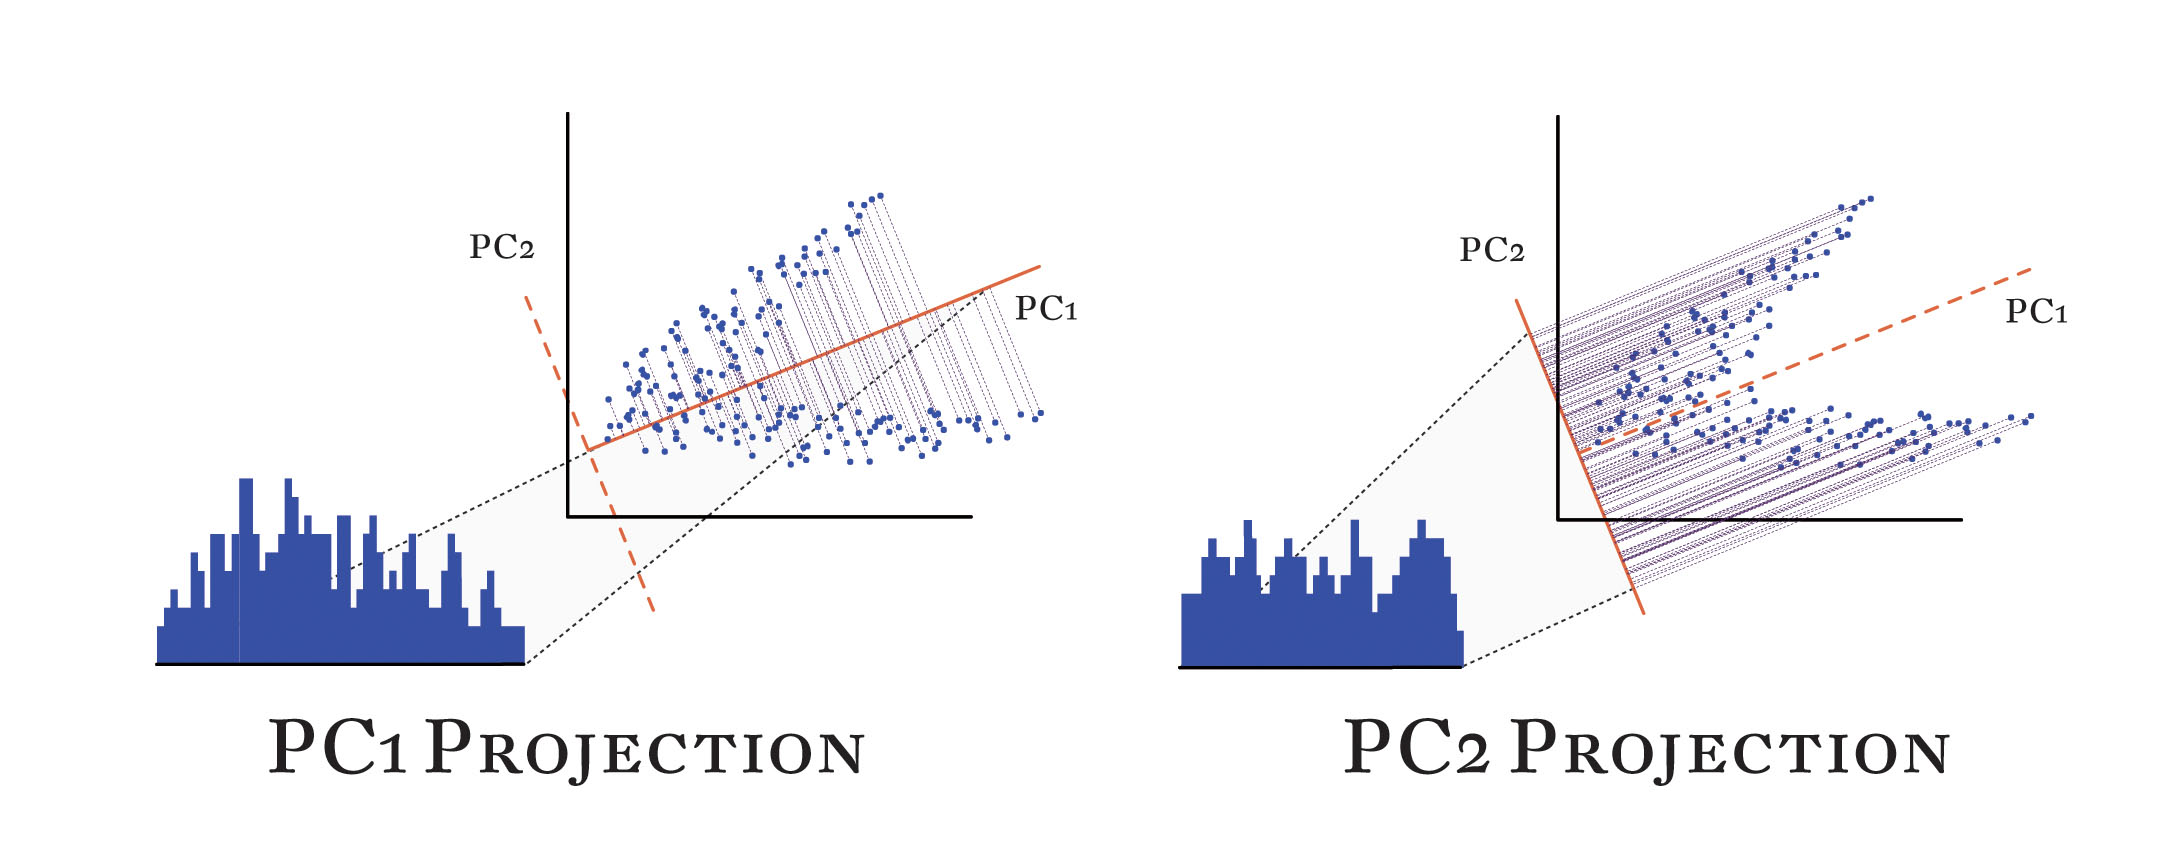

In [4]:
displayImage('pcProjection.jpg', width = 800)

With PCA, we want to find principal components that capture the most variance in the data and we want to minimize variance in the principal components that we are dropping (so we want the distribution of data about that component to be as flat as possible). By doing this, we maximize the information in the principal components that we keep and minimizing the data lost by dropping the other principal components.

In the graphs above, the distribution of the data projected to the second principal component, $PC_2$ is much flatter than the distribution of the data projected to the first principal component, $PC_1$. Thus, we can see that more information about the data is captured by $PC_1$ than $PC_2$.

<a id="section1c"></a>
### Basis Shifts with ICA 

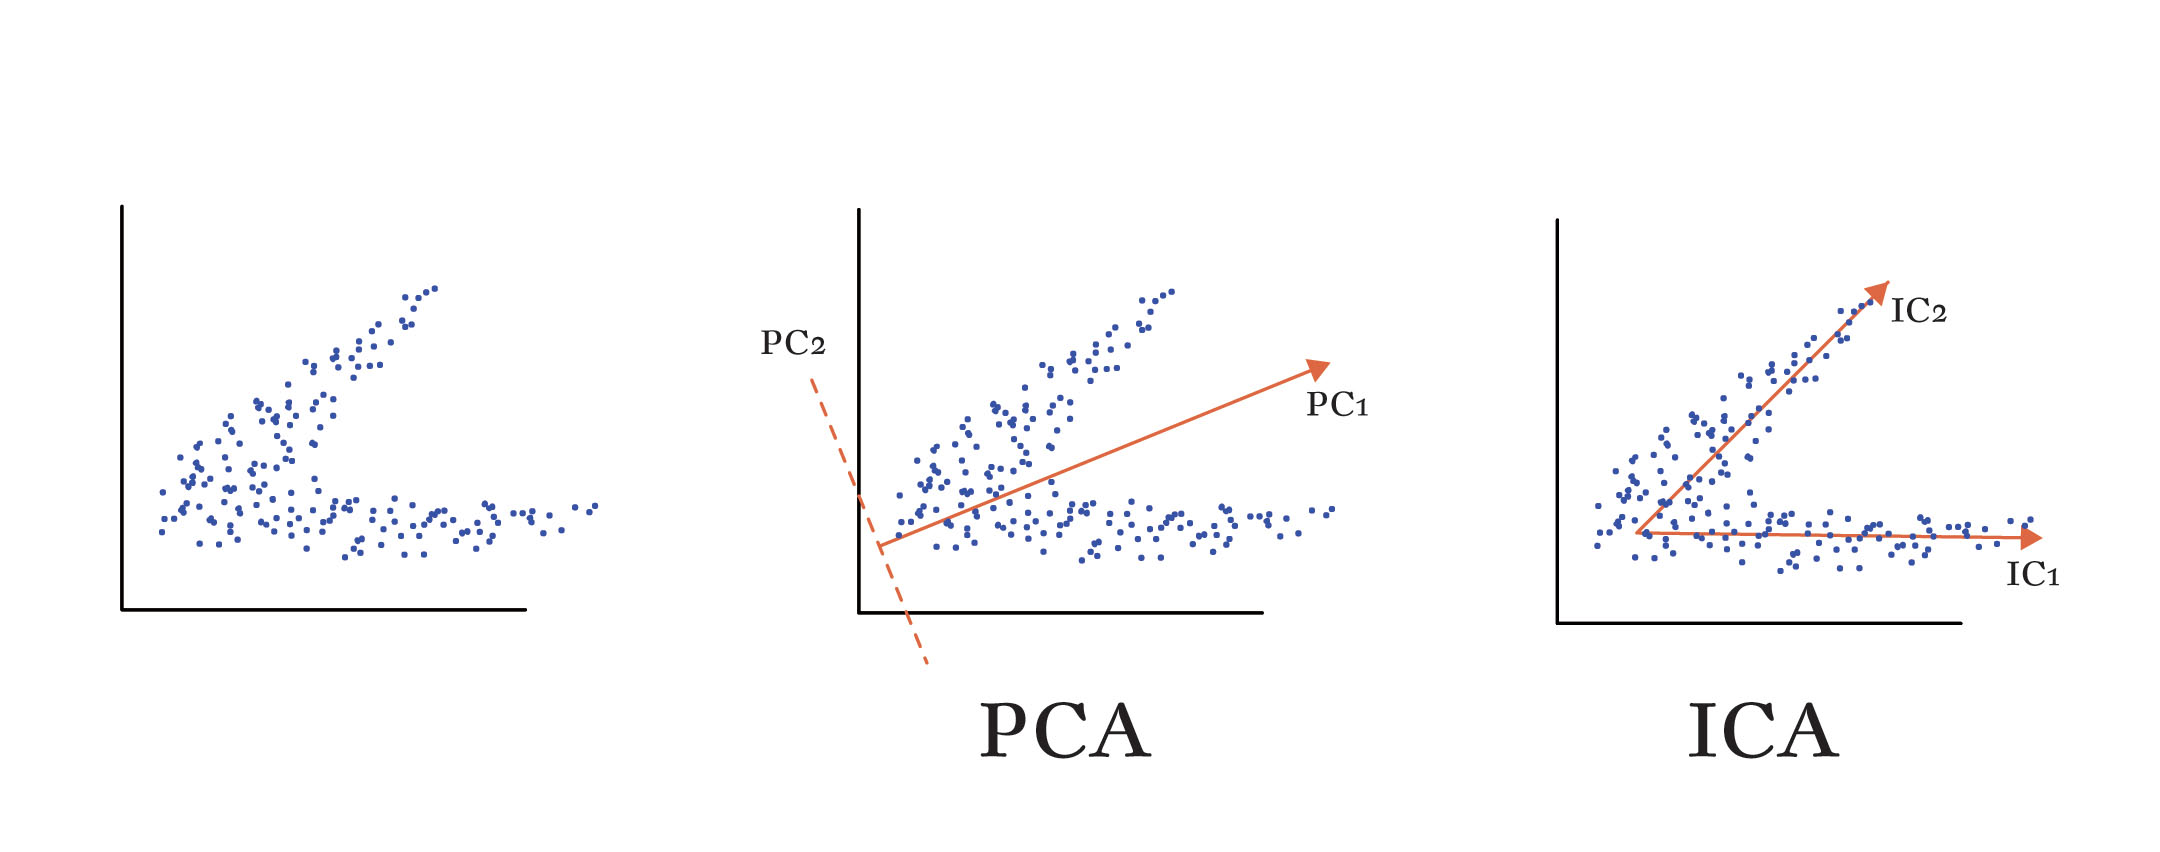

In [5]:
displayImage('pcaVIca1.jpg', width = 900)

With ICA, our goal is not to reduce the dimensionality of our data. Instead, we are looking to extract some information about the underlying structures of the data. Specifically, we are assuming that the data is composed of a linear combination of (statistically) independent sources. The goal of ICA is to identify these sources. 

With the underlying structures of the data revealed, we can understand a lot more about the broader phenomena that is captured in our dataset.

Before we get into the applications of ICA, let's take some time to understand how it works.

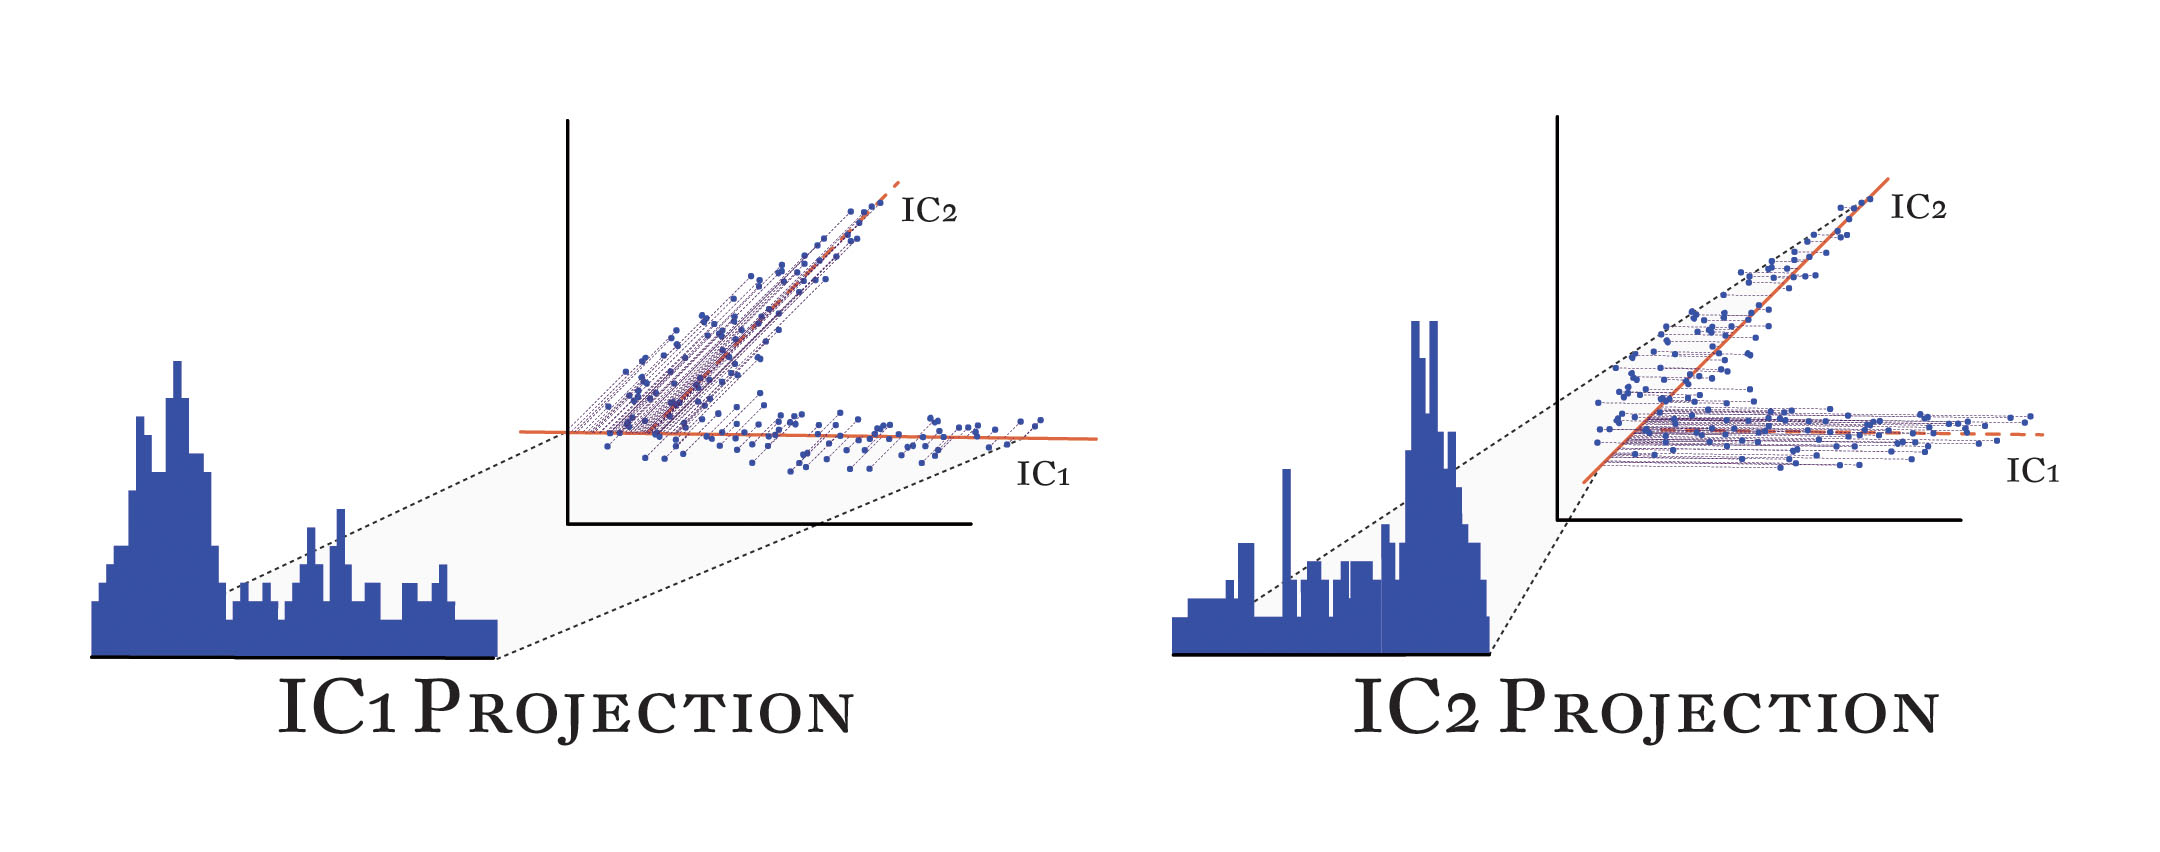

In [6]:
displayImage('icProjection.jpg', width = 700)

To isolate our sources, we want to shift our bases to minimize redundancy of the data between the bases. In other words, we want to maximize the amount that our data is described by some singular basis and minimize the amount that it is described by all other bases.

The distributions of data projected onto the independent components above are illustrative of this lack of redundancy. In each distribution, the graph spikes in one area and is relatively flat in the rest of the distribution. Note that these spikes correspond to separate structures in the data.

Because our independent components model unique structures in the data, they are each equally important in describing the data and thus are not good candidates for dimensionality reduction (in many cases you will want to perform dimensionality reduction before running ICA).

<a id="section1d"></a>
### Mathematical Definition of ICA 

<center>
$X = A·S$ <br> <br>

$X$ - Observed Signals &nbsp;
$A$ - Mixing Matrix &nbsp;
$S$ - Source Signals 
<br> <br>
    $\begin{equation}X = \begin{bmatrix} x_0(t)\\x_1(t)\\...\\x_n(t) \end{bmatrix} \end{equation}$&nbsp;
    $\begin{equation}A = \begin{bmatrix} a_{00} \ \ \ a_{01} \ \ \ ... \ \ \ a_{0n}\\a_{10} \ \ \ a_{11} \ \ \ ... \ \ \ a_{1n}\\...\\a_{n0} \ \ \ a_{n1} \ \ \ ... \ \ \ a_{nn}\end{bmatrix}\end{equation}$
    $\begin{equation}S = \begin{bmatrix} s_{0}(t)\\s_1(t)\\...\\s_n(t) \end{bmatrix} \end{equation}$ <br> <br>
</center>

The equation above illustrates the broad idea of ICA. Given a dataset $X$, we want to determine $A$ and $S$, where $S$ is our set of independent components and $A$ is the set of weights which combine the independent sources to get the observed signals. Note that ICA makes the assumption that there are a set of sources which are linearly weighted in our observed signals.

The actual process for deriving these values involves a lot of linear algebra and would require a separate tutorial to cover. There are a number of different ways to do this, but one very common algorithm is called FastICA and is described in <a href="https://ac.els-cdn.com/S0893608000000265/1-s2.0-S0893608000000265-main.pdf?_tid=44dd1c69-8dca-40ff-a03d-e617eac2cec3&acdnat=1522466583_6dbf5552c19f4c8372e03ff465c538ea"> this paper</a>. FastICA is implemented in sklearn - the source code <a href="https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/decomposition/fastica_.py#L381">can be found here</a>.

<a id="section2"></a>
## Example: Peak Electrical Demand / High Temperature 

<a id="section2a"></a>
### Plotting Data 

In class, we looked at a dataset which contained Pittsburgh's daily high temperature and peak electical demand. Let's take a look at it with ICA.

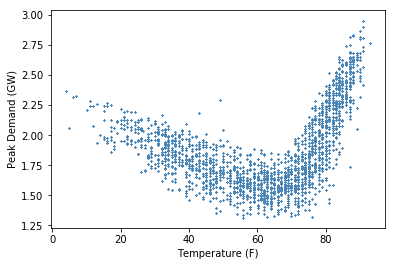

In [7]:
# Load data
df = pd.read_csv("temp_demand.csv", index_col="Date")

# Plot data
plt.scatter(df['Temp'], df['Load'], s=2, marker='x', color='steelblue')
plt.xlabel("Temperature (F)")
plt.ylabel("Peak Demand (GW)")
plt.show()

We can see emperically that there are two underlying trends here. ICA should be able to pick these up.

<a id="section2b"></a>
### Run ICA

In [8]:
# Create an instance of sklearn's fastIca class
ica = sklearn.decomposition.FastICA(n_components = 2, algorithm='deflation', whiten='false', fun='exp')

# Fit the model to our data
model = ica.fit(df)

# Print out the components and mixing matrix
print("These are the vectors which map the sources into the observed data")
print("Mixing matrix: ")
print(ica.mixing_)

print("\n\nThese are the vectors which map the observed data to the independent sources")
print("Components: ")
print(ica.components_)

These are the vectors which map the sources into the observed data
Mixing matrix: 
[[-825.89475048 -142.70690077]
 [  -6.21965067   11.8487797 ]]


These are the vectors which map the observed data to the independent sources
Components: 
[[-0.00111012 -0.01337029]
 [-0.00058272  0.07737856]]


It's important to note that the signs of the outputs of ICA can vary. If you run the above code several times, you will notice that the resulting component values are sometimes positive and sometimes negative. Because ICA is looking for vectors that are independent, the notion of directionality is lost. But while the sign of the outputs are not consistent, the relative signs of the outputs are.

It shouldn't really affect much, but is helpful to constrain the signs of ICA's outputs for visualization.

<a id="section2c"></a>
### Plot Bases

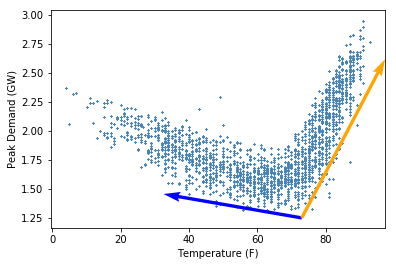

In [9]:
# Get ICA bases
bases = ica.mixing_

plt.scatter(df['Temp'], df['Load'], s=2, marker='x', color='steelblue')

# Using quiver as arrows because I'm not a fan of matplotlib arrows
plt.quiver(73, 1.25, -abs(bases[0][0]), abs(bases[0][1]), width=0.01, scale = 2000, color = 'blue')
plt.quiver(73, 1.25, abs(bases[1][0]), abs(bases[1][1]), width= 0.01, scale = 25, color = 'orange')

plt.xlabel("Temperature (F)")
plt.ylabel("Peak Demand (GW)")
plt.show()

Great, it works just as we thought it would. Now let's check out the resulting distributions of our new bases.

<a id="section2d"></a>
### Checking Distributions

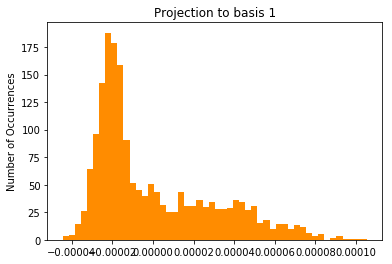

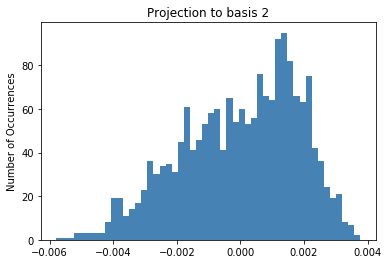

In [10]:
# Recover the source signals
recovered = ica.transform(df)

# Make the signs of the data consistent across multiple calls and line up with the scatter plot above
if ((bases[0][0],bases[0][1]) != (-abs(bases[0][0]), abs(bases[0][1]))): 
    bases[0][0] = -abs(bases[0][0])
    bases[0][1] = abs(bases[0][1])
    recovered[:,0] *= -1
if ((bases[1][0],bases[1][1]) != (abs(bases[1][0]),abs(bases[1][1]))):
    bases[1][0] = abs(bases[1][0])
    bases[1][1] = abs(bases[1][1])
    recovered[:,1] *= -1

# Project onto the bases
projected = np.dot(recovered, ica.components_)

# Plot the data
plt.hist(projected[:,0], bins = 50, color = "darkorange")
plt.title("Projection to basis 1")
plt.ylabel("Number of Occurrences")
plt.show()
plt.title("Projection to basis 2")
plt.hist(projected[:,1], bins = 50, color = "steelblue")
plt.ylabel("Number of Occurrences")
plt.show()

From these distributions, we can see that we've got a good split of the data here. The peak in basis 1 corresponds to the more horizontal portion of the scatter plot. The peak in basis 2 corresponds to the more vertical portion of the scatter plot. 

This is what we wanted to see - it seems like we're ready to take a look at the actual signals that are generating this data.

<a id="section2e"></a>
### Source Signals

Basis vector 1: [-1.70533418  0.29466582]


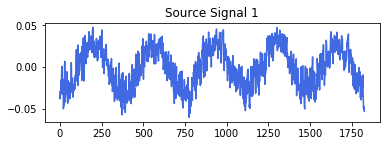

---------------------------------------------------- 
Basis vector 2: [2.20980924 4.20980924]


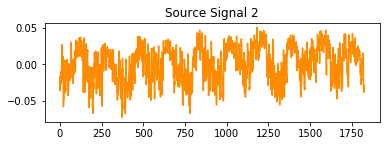


Number of days of data: 1826
Number of years of data: 5


In [11]:
# We've already recovered the signals in the previous section (stored in the variable 'recovered')
# All we have to do now is plot the signals themselves

print("Basis vector 1: " + str(bases[0] / bases[0].std()))
plt.subplot(2,1,1)
plt.plot(recovered[:,0], color = "royalblue")
plt.title("Source Signal 1")
plt.show()

print("---------------------------------------------------- ")
print("Basis vector 2: " + str(bases[1] / bases[1].std()))
plt.subplot(2,1,2)
plt.plot(recovered[:,1], color = "darkorange")
plt.title("Source Signal 2")
plt.show()

# Let's also display some information about the number of samples we have
print("\nNumber of days of data: %d"%(recovered[:,0].size))
print("Number of years of data: %d"%(recovered[:,0].size / 365))

Now that we have the source signals, we can start to analyze the data in a meaningful way.

The first thing to do is understand what these signals actually correspond to. By looking at the scatter plot with the bases, we can see that the source signal 1 (blue) is similar to the temperature basis and source signal 2 (orange) seems to be similar to our energy consumption basis. So we know that signal 1 mostly describes temperature and signal 2 mostly describes energy consumption.

When we look at the signals, they both seem pretty periodic. We can easily see that signal 1 has five cycles. We also know that the data has 5 years of data. Since we know that signal 1 is similar to the temperature basis, we can deduce that the rise and fall of signal 1 corresponds to the temperature shifts of changing from summer into winter and vice-versa.

We can look at signal 2 and make a similar observation that the ten cycles correspond to the biannual fluctuation. When we look at our original graph of temperature and energy consumption, we see that the point of inflection in the graph is at around 70 degrees. Logically, the temperature will cross this boundary twice a year - once when the winter starts to melt off, and again when the summer cools down.

Let's see what information we can glean from plotting this data at multiple scales.

<a id="section2f"></a>
### Visualization

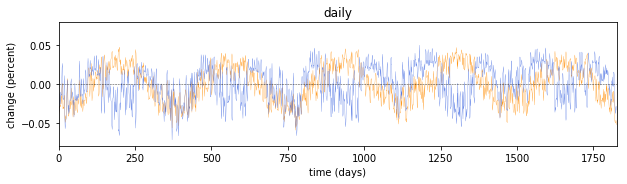

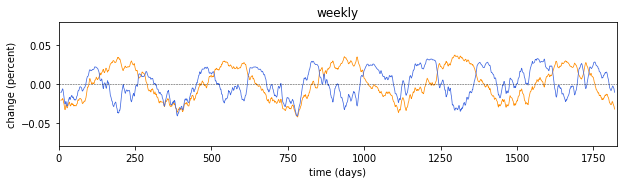

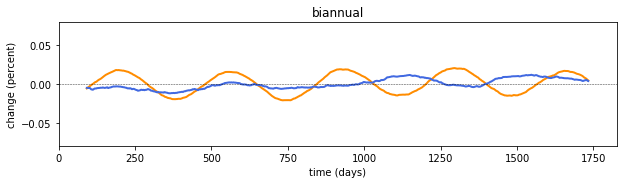

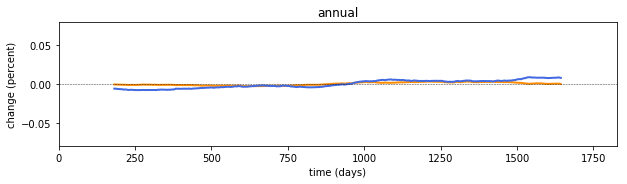

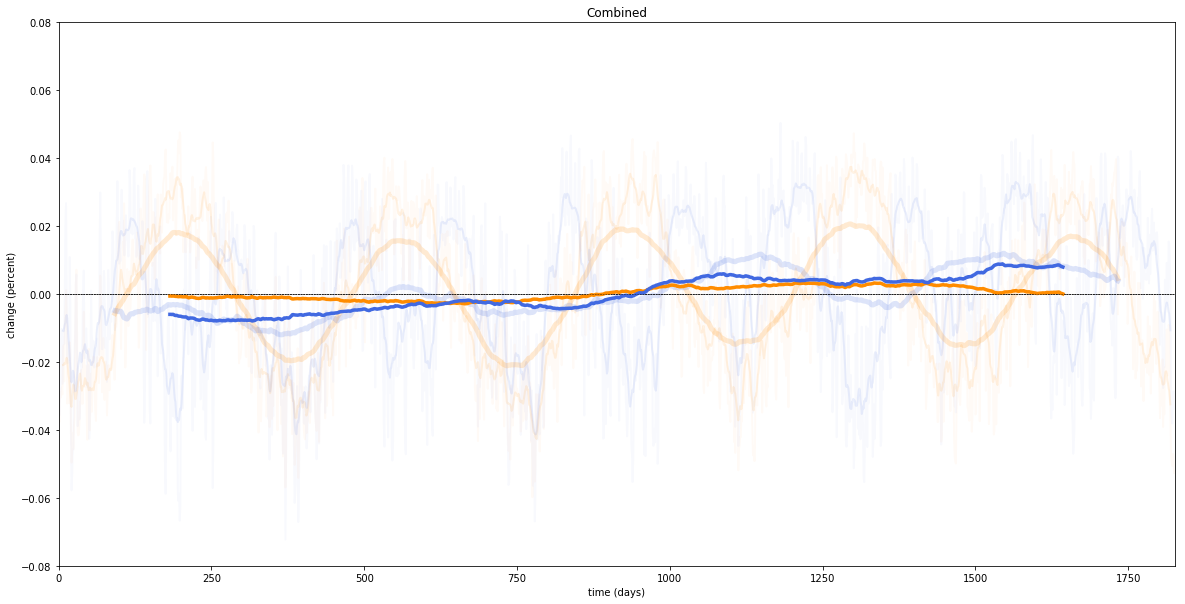

In [12]:
# Convert np array to pandas dataframe
recovered_df = pd.DataFrame(recovered)

# Apply a rolling filter to the data to smooth it out at different scales
weekly = recovered_df.rolling(14,center=True).mean().as_matrix()
biannual = recovered_df.rolling(185,center=True).mean().as_matrix()
annual = recovered_df.rolling(365,center=True).mean().as_matrix()

def plotData(matrix, linewidth = .25, alpha = 1, title = "", show = True, small = True):
    if small:
        plt.subplots(figsize=[10,5])
        plt.subplot(2,1,1)
    plt.title(title)
    plt.plot(matrix[:,0], linewidth = linewidth, alpha = alpha, color = 'darkorange')
    plt.plot(matrix[:,1], linewidth = linewidth, alpha = alpha, color = 'royalblue')
    plt.plot([0,1826],[0,0], ls="--", color="black", linewidth = 0.5, alpha = 0.8)
    plt.xlabel("time (days)")
    plt.ylabel("change (percent)")
    plt.ylim(-0.08,0.08)
    plt.xlim(0,1826)
    if show:
        plt.show()

# Plot the data at various scales
plotData(recovered_df.as_matrix(), title="daily")
plotData(weekly, linewidth = 0.75, title="weekly")
plotData(biannual, linewidth = 2, title="biannual")
plotData(annual, linewidth = 2, title="annual")

# Plot the data together
plt.subplots(figsize=[20,10])
plotData(recovered_df.as_matrix(), linewidth=2, alpha=0.035, show = False, small = False)
plotData(weekly, linewidth = 2, alpha = .1, show = False, small = False)
plotData(biannual, linewidth = 5, alpha = .175, show = False, small = False)
plotData(annual, linewidth = 3.5, title="Combined", small = False)

When plotted like this, the data is much more rich than the initial scatter plot of temperature and peak demand. It is particularly nice because it normalizes the data and presents the data as a function of change over time. This format tells a much different story about the data that we have, and is a great analytical tool to have available.

<a id="section3"></a>
## Example: Cocktail Party Problem

<a id="section3a"></a>
### Introduction

Perhaps _THE_ canonical example of ICA is what is called the "cocktail party problem". It's not exactly a data science problem, but it is a good way to show the power of ICA. In this problem, we are at a loud party with loud music and many people around and we are trying to listen to the person next to us talking. Our objective is to isolate the speech signal so that we can understand what is being said to us.

The problem here is to take two mixed sound sources (from our two ears) and separates the indpenendent sounds from them. Because the distance from our ears to the sound sources varies, we actually have two signals that weight the independent sources slightly differently. This is an ideal scenario for ICA.

Though the traditional problem is done with two signals, we're going to step this up a bit and separate three sources. It is essentially the same process, but we already saw ICA's capability to separate two signals, so hopefully this should be at least a little bit more impressive.

<a id="section3b"></a>
### Loading and Inspecting Original Sounds

First, let's load in source sounds and give them a brief inspection

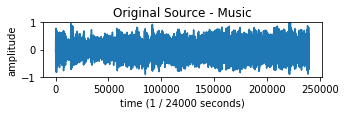

----------------------------------------------


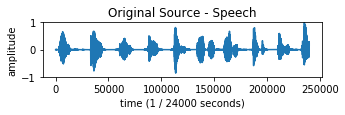

----------------------------------------------


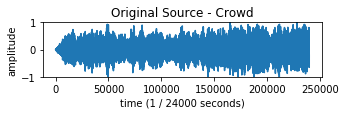

----------------------------------------------


In [13]:
# Load in the source sounds
sampleRate, music = scipy.io.wavfile.read("music.wav")
sampleRate, speech = scipy.io.wavfile.read("speech.wav")
sampleRate, crowd = scipy.io.wavfile.read("crowd.wav")

# Normalize the sounds between -1 and 1
music = music / music.max()
speech = speech / speech.max()
crowd = crowd / crowd.max()

# Function to olay our sounds and plot their frequencies
def plotAndPlay(audio, title=""):
    plt.figure(figsize=(5,1))
    plt.plot(audio)
    plt.xlabel("time (1 / %d seconds)"%sampleRate)
    plt.ylabel("amplitude")
    plt.ylim([-audio.max(),audio.max()])
    plt.title(title)
    plt.show()
    display(Audio(audio, rate = sampleRate, embed = True))
    print("----------------------------------------------")
    

# Plot the data
plotAndPlay(music, "Original Source - Music")
plotAndPlay(speech, "Original Source - Speech")
plotAndPlay(crowd, "Original Source - Crowd")

<a id="section3c"></a>
### Combining Sources and Inspecting

Now, let's mix the sources so that they're not easily distinguishable. It's important that we weight the signals with statistical independency, so we'll randomly generate our weights to ensure this property. Because of this, we may get some combinations that sound almost like the original source - which doesn't prove to be as impressive as sources which are well mixed. Feel free to rerun the mixing code until you are satisfied with the muddiness of the sounds.

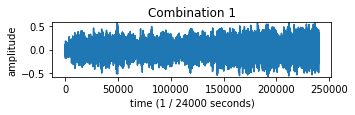

----------------------------------------------


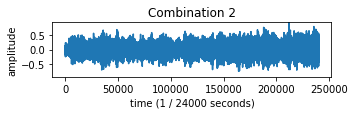

----------------------------------------------


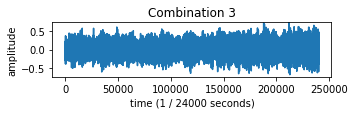

----------------------------------------------


In [42]:
# Mix the sounds with random weights
randomMixMatrix = np.random.rand(3,3)
combine, combine1, combine2 = np.dot(randomMixMatrix, [music,speech,crowd])

# Plot the data
plotAndPlay(combine, "Combination 1")
plotAndPlay(combine1, "Combination 2")
plotAndPlay(combine2, "Combination 3")

<a id="section3d"></a>
### Separating Sounds

Now that we've mixed the sounds, let's run ICA on them to extract the original sounds.

For this one, we'll use an algorithm for ICA called Fourth-Order Blind Identification (FOBI), which separates the sources much more cleanly and consistently than fastICA. With this algorithm, we are solving the same problem but approaching it differently. I won't go into the details, but you can read about it <a href = "http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=DAF6B72E49BF6807B37978972FCB5589?doi=10.1.1.8.5483&rep=rep1&type=pdf">here</a>.

The implementation of 'icaFOBI' below comes from Shash Shukla and can be found <a href="https://github.com/ShashShukla/ICA/blob/master/cocktail_FOBI.py">here</a>

In [15]:
# Implementation of Fourth-Order Blind Identification
# Source: https://github.com/ShashShukla/ICA/blob/master/cocktail_FOBI.py
def icaFOBI(signals, sampleRate):
    cov = np.cov(signals)
    d, E = linalg.eigh(cov)
    D = np.diag(d)
    Di = linalg.sqrtm(linalg.inv(D))
    xn = np.dot(Di, np.dot(np.transpose(E), signals))
    norm_xn = linalg.norm(xn, axis=0)
    norm = [norm_xn for x in range(signals.shape[0])]
    cov2 = np.cov(np.multiply(norm, xn))
    d_n, Y = linalg.eigh(cov2)
    source = np.dot(np.transpose(Y), xn)
    return source

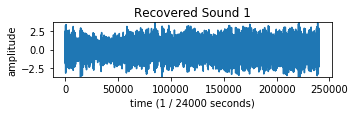

----------------------------------------------


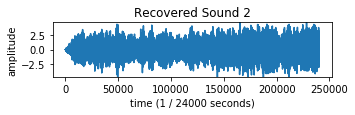

----------------------------------------------


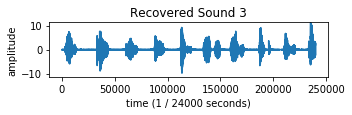

----------------------------------------------


In [16]:
# Apply ICA to the signals
recovered = icaFOBI(np.array([combine,combine1,combine2]), sampleRate)
plotAndPlay(recovered[0],"Recovered Sound 1")
plotAndPlay(recovered[1],"Recovered Sound 2")
plotAndPlay(recovered[2],"Recovered Sound 3")

So there we have it, our original signals separated with a great level of precision.

<a id="section4"></a>
## CONCLUSION

In this tutorial, we've gone over what ICA is, and applied ICA in two very different scenarios. 
Here are some resources for further investigation

Tutorials / code:<br>
<a href="https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/decomposition/fastica_.py#L381">sklearn fastICA source code </a><br>
<a href="http://scikit-learn.org/dev/modules/generated/sklearn.decomposition.FastICA.html#sklearn.decomposition.FastICA"> fastICA sklearn reference</a><br>
<a href="http://scikit-learn.org/dev/auto_examples/decomposition/plot_faces_decomposition.html">Face decomposition with ICA and sklearn</a>

Video:<br>
<a href="https://youtu.be/QGd06MTRMHs?t=39m49s">Andrew NG on ICA</a>

Papers:<br>
<a href="https://link.springer.com/content/pdf/10.1007/3-540-36227-4_20.pdf">Separating news from commercials with ICA</a><br>
<a href="https://papers.nips.cc/paper/1091-independent-component-analysis-of-electroencephalographic-data.pdf">Denoising EEG data with ICA</a><br>
<a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2898524/pdf/nihms-199383.pdf">Face Recognition with ICA</a><br>

